# Unit 4 Unsupervised Learning Capstone DRAFT


# Abstract

Introductory Text to be Added


# Importing and Setting Up the Models

In [25]:
# Required imports
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

# Model imports
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
%matplotlib inline

In [26]:
# Load the file for analysis and view columns

df = pd.read_csv('/Users/lacivert/4/Yld_FX_Eq.csv')

dfyields = pd.DataFrame(df)

list(dfyields.columns.values)

['Date',
 'US1mo',
 'US3mo',
 'US6mo',
 'EURUSD',
 'JPYUSD',
 'GBPUSD',
 'SP500',
 'NIKKEI225',
 'FTSE100']

In [27]:
dfyields.dropna(how='any', inplace=True)
dfyields.describe()

,US1mo,US3mo,US6mo,EURUSD,JPYUSD,GBPUSD,SP500,NIKKEI225,FTSE100
count,4193.000000,4193.000000,4193.000000,4193.000000,4193.000000,4193.000000,4193.000000,4193.000000,4193.000000
mean,1.213620,1.271972,1.388984,0.010611,-0.000036,0.001662,0.025490,0.000024,0.000117
std,1.511747,1.536750,1.568568,0.611770,0.006878,0.603868,1.160914,0.014790,0.011884
min,0.000000,0.000000,0.020000,-2.960000,-0.050000,-7.840000,-9.040000,-0.120000,-0.090000
25%,0.060000,0.080000,0.150000,-0.330000,0.000000,-0.320000,-0.440000,-0.010000,-0.010000
50%,0.520000,0.760000,0.920000,0.010000,0.000000,0.010000,0.060000,0.000000,0.000000
75%,1.740000,1.800000,1.980000,0.360000,0.000000,0.340000,0.550000,0.010000,0.010000
max,5.270000,5.190000,5.330000,4.730000,0.030000,4.530000,10.790000,0.130000,0.100000


In [28]:
# TEXT TO ADDED ABOUT EDA

In [29]:
# the first dates
dfyields.head(3)

,Date,US1mo,US3mo,US6mo,EURUSD,JPYUSD,GBPUSD,SP500,NIKKEI225,FTSE100
0,7/31/01,3.67,3.54,3.47,0.16,0.01,-0.49,0.56,-0.02,0.02
1,8/2/01,3.65,3.53,3.46,0.23,-0.01,-0.24,0.40,-0.04,0.01
2,8/3/01,3.63,3.52,3.47,0.34,0.00,-0.19,-0.52,0.01,-0.01


In [30]:
# The last dates
dfyields.tail(3)

,Date,US1mo,US3mo,US6mo,EURUSD,JPYUSD,GBPUSD,SP500,NIKKEI225,FTSE100
4190,8/29/18,1.97,2.13,2.28,-0.18,0.01,0.93,0.57,0.0,-0.01
4191,8/30/18,1.97,2.11,2.28,-0.45,-0.01,-0.07,-0.44,0.0,-0.01
4192,8/31/18,1.95,2.11,2.28,-0.43,0.00,-0.25,0.01,0.0,-0.01


In [31]:
# drop the date column to keep the entire dataframe the same datatype, i.e. integers
dfylds = dfyields.drop(columns=['Date'],axis=1)

# print data types
dfylds.dtypes

US1mo        float64
US3mo        float64
US6mo        float64
EURUSD       float64
JPYUSD       float64
GBPUSD       float64
SP500        float64
NIKKEI225    float64
FTSE100      float64
dtype: object

In [38]:
# Setting up my variables

# US Fixed Income Yield Curve Spot Rates
one_month, three_month, six_month = df.loc[:,'US1mo'], df.loc[:,'US3mo'], df.loc[:,'US6mo']

# FX Spot Rates
EURUSD, JPYUSD, GBPUSD = df.loc[:,'EURUSD'], df.loc[:,'JPYUSD'], df.loc[:,'GBPUSD']

# Equity Indices
USSP500, JPNIKKEI225, UKFTSE100 = df.loc[:,'SP500'], df.loc[:,'NIKKEI225'], df.loc[:,'FTSE100']

In [39]:
list(dfylds.columns.values)

['US1mo',
 'US3mo',
 'US6mo',
 'EURUSD',
 'JPYUSD',
 'GBPUSD',
 'SP500',
 'NIKKEI225',
 'FTSE100']

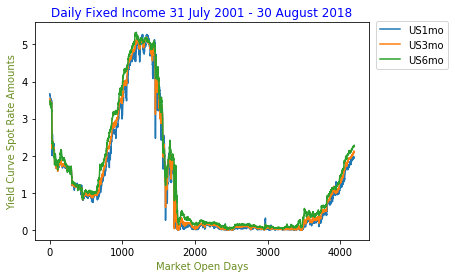

In [40]:
plt.plot (one_month)
plt.plot (three_month)
plt.plot (six_month)
plt.xlabel ('Market Open Days', color='olivedrab')
plt.ylabel ('Yield Curve Spot Rate Amounts', color='olivedrab')
plt.title ('Daily Fixed Income 31 July 2001 - 30 August 2018', color='blue')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1.03)) 

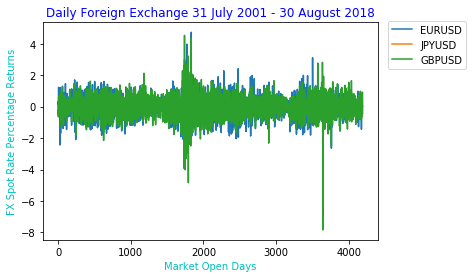

In [41]:
plt.plot (EURUSD)
plt.plot (JPYUSD)
plt.plot (GBPUSD)
plt.xlabel ('Market Open Days', color='c')
plt.ylabel ('FX Spot Rate Percentage Returns', color='c')
plt.title ('Daily Foreign Exchange 31 July 2001 - 30 August 2018', color='blue')
plt.legend(loc='upper right', bbox_to_anchor=(1.28, 1.03)) 

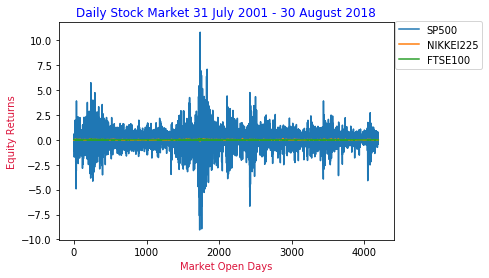

In [46]:
plt.plot (USSP500)
plt.plot (JPNIKKEI225)
plt.plot (UKFTSE100)
plt.xlabel ('Market Open Days', color='crimson')
plt.ylabel ('Equity Returns', color='crimson')
plt.title ('Daily Stock Market 31 July 2001 - 30 August 2018', color='blue')
plt.legend(loc='upper right', bbox_to_anchor=(1.28, 1.03)) 

Text(0.5,1,'Correlation Matrix Heatmap\nDaily Frequency of 31 July 2001 to 31 August 2018')

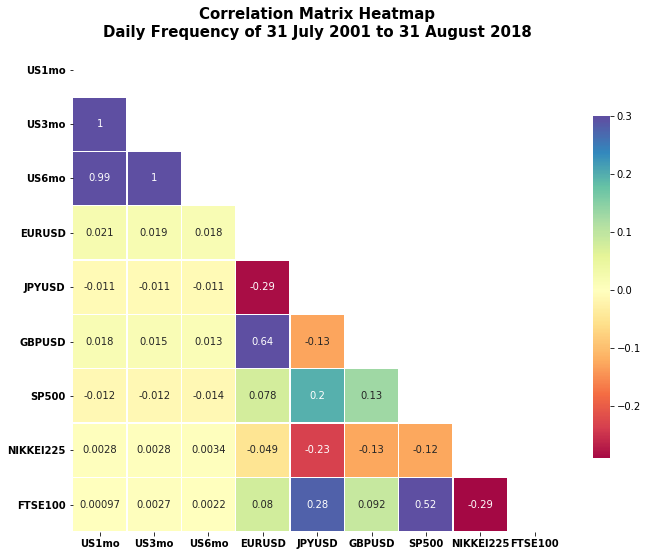

In [53]:
# Generate a correlation matrix function and assign it
corr = dfylds.corr()

# Generate an upper triangle mask
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask, correct aspect ratio and Spectral color theme
sns.heatmap(corr, mask=mask, cmap='Spectral', vmax=.3, center=0, annot_kws={"size": 10}, 
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .7})

# Make it readable and nice
plt.yticks(rotation=0, fontweight='bold', fontsize=10)
plt.xticks(fontweight='bold', fontsize=10)
plt.title('Correlation Matrix Heatmap\nDaily Frequency of 31 July 2001 to 31 August 2018'
          , fontweight='bold', fontsize=15,color='k')

# K - Means Clustering Algorithm

Text to Added about K - Means


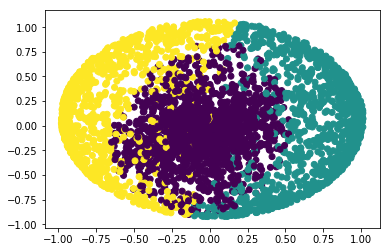

In [55]:
# K-Means begins by normalization of the data
X_norm = normalize(dfylds)

# Reduce it to 10 maturity points instead of 11 . . . maybe change 10 to 2?
X_pca = PCA(9).fit_transform(X_norm)

# Calculate predicted values . . . change random state to 100?
y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X_pca)

# Plot the solution . . . how does one interpret the blobs below?
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Means Shift Clustering Algorithm

Text to be added

In [56]:
# Set the bandwidth
bandwidth = estimate_bandwidth(dfylds, quantile=0.2, n_samples=5000)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(dfylds)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 8


In [57]:
#plt.scatter(x argument to put here, y argument to put here, c=labels)
#plt.show()

# print('Comparing the assigned categories to the ones in the data:')
# print(pd.crosstab(???,labels))

# Spectral Clustering Algorithm

Text to be added


In [58]:
# Three clusters of 3 in Fixed Income, 3 in FX and 3 in Equity
n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(dfylds)

SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
          eigen_solver=None, eigen_tol=0.0, gamma=1.0, kernel_params=None,
          n_clusters=3, n_init=10, n_jobs=1, n_neighbors=10,
          random_state=None)

In [59]:
#Predicted clusters . . . Need to look into this
predict=sc.fit_predict(dfylds)

predict

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

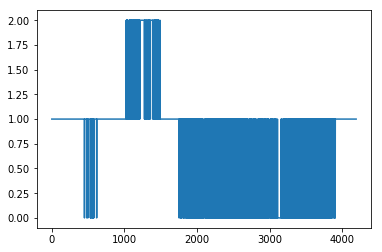

In [60]:
plt.plot (predict)

# Affinity Propagation Clustering Algorithm

Text to be added

In [62]:
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(dfylds)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 110


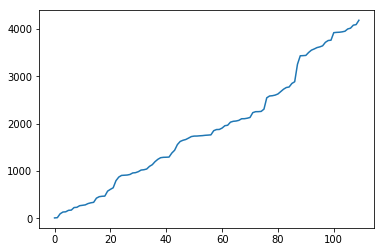

In [63]:
# Need some work . . .
plt.plot (cluster_centers_indices)

# Mahalanobis Distance

Text to be added

In [64]:
from scipy.spatial.distance import mahalanobis

In [65]:
# Worry about this later, may need to drop a vector, a maturity point of the eleven for covariance matrix